# Main 

Zexuan: The main file for category ML model production

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sqlite3
from sqlalchemy.engine import create_engine

from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from tpot import TPOTClassifier

import tpot_functions 
import periods 
import utils


Define some key variables and numbers

In [31]:
target = 'deal_probability'
LIMIT = 500000
TIMEOUT_MINS = 30
SCORING = 'neg_mean_squared_error'
RS = 23

In [32]:
train = pd.read_csv('data/train.csv')[:LIMIT]
train_pd = pd.read_csv('train_price_normalized.csv')[:LIMIT]
#train_periods = pd.read_csv('data/periods_aggregate_features_items.csv')

In [33]:
train = pd.concat([train_pd[['item_id', 'price', 'norm_price', target]], 
                  pd.get_dummies(train[['category_name', 'user_type']])], 
                  axis=1) 

#train = pd.concat(pd.get_dummies(train[['category_name', 'user_type', target]]), train[['item_id', 'price', target]]
      


In [34]:
train

,item_id,price,norm_price,deal_probability,category_name_Автомобили,category_name_Аквариум,category_name_Аудио и видео,category_name_Билеты и путешествия,category_name_Бытовая техника,category_name_Велосипеды,...,category_name_Спорт и отдых,category_name_Телефоны,category_name_Товары для детей и игрушки,category_name_Товары для животных,category_name_Товары для компьютера,category_name_Фототехника,category_name_Часы и украшения,user_type_Company,user_type_Private,user_type_Shop
0,b912c3c6a6ad,400.0,-0.896869,0.12789,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,2dac0150717d,3000.0,-0.907920,0.00000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,ba83aefab5dc,4000.0,-0.965905,0.43177,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,02996f1dd2ea,2200.0,-0.432782,0.80323,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,7c90be56d2ab,40000.0,-0.901015,0.20797,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,51e0962387f7,1300.0,-0.664825,0.80323,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,c4f260a2b48a,11000.0,-0.444354,0.00000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,6b71309d6a8a,500.0,-0.929916,0.80323,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,c5b969cb63a2,500.0,-0.929916,0.00000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,b1570962e68c,400.0,-0.962648,0.00000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
#train_new = pd.merge(train, train_periods, on='item_id')
#train_new

In [36]:
train = train.dropna()
train

,item_id,price,norm_price,deal_probability,category_name_Автомобили,category_name_Аквариум,category_name_Аудио и видео,category_name_Билеты и путешествия,category_name_Бытовая техника,category_name_Велосипеды,...,category_name_Спорт и отдых,category_name_Телефоны,category_name_Товары для детей и игрушки,category_name_Товары для животных,category_name_Товары для компьютера,category_name_Фототехника,category_name_Часы и украшения,user_type_Company,user_type_Private,user_type_Shop
0,b912c3c6a6ad,400.0,-0.896869,0.12789,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,2dac0150717d,3000.0,-0.907920,0.00000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,ba83aefab5dc,4000.0,-0.965905,0.43177,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,02996f1dd2ea,2200.0,-0.432782,0.80323,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,7c90be56d2ab,40000.0,-0.901015,0.20797,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,51e0962387f7,1300.0,-0.664825,0.80323,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,c4f260a2b48a,11000.0,-0.444354,0.00000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,6b71309d6a8a,500.0,-0.929916,0.80323,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,c5b969cb63a2,500.0,-0.929916,0.00000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,b1570962e68c,400.0,-0.962648,0.00000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
X = (train.drop(['item_id',target], axis=1)).values
y = train[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.75, test_size=0.25)
#X_train = X
#y_train = y

In [17]:
# TimeSeriesSplit NOT RIGHT YET
#tss = TimeSeriesSplit(n_splits=4)
#train_index, test_index = list(tss.split(X))[-1]
#X_train, X_test = X[train_index], X[test_index]
#y_train, y_test = y[train_index], y[test_index]

TPOT functions

In [18]:
#tpot_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
#                      random_state=42, verbosity=2)

In [21]:
#tpot_optimizer = tpot_functions.TpotAutoml(mode='regression', max_time_mins=TIMEOUT_MINS, 
#                                           scoring=SCORING, random_state=RS, n_jobs=-1,verbosity=2,
#                                           generations = 2, population_size=15)


In [20]:
#tpot_optimizer.fit(X_train, y_train)

In [ ]:
#top_scores = tpot_optimizer.get_top_models(return_scores=True)
#print('\ntop cv scores:')
#print(top_scores)
#print('\ntop models')
#print(tpot_optimizer.top_models)
#print('\nthe best test score:')
#test_score = tpot_optimizer.score(X_test, y_test)
#print(test_score)

Try GradientBoostingRegressor model 

In [38]:
#GBR = GradientBoostingRegressor(alpha=0.85, learning_rate=0.1, loss="ls",
#                                              max_features=0.9, min_samples_leaf=5,
#                                              min_samples_split=6)

In [44]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
GBR  = GradientBoostingRegressor(**params)

In [45]:
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [46]:
mse = mean_squared_error(y_test, GBR.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 0.0572


In [47]:
# Does not make sense
#r2 = r2_score(y_test, GBR.predict(X_test))
#print("R2: %.4f" % r2)

In [29]:
results = GBR.predict(X_test)
results

array([0.28596679, 0.2110364 , 0.0722803 , ..., 0.145544  , 0.04167599,
       0.19889455])

Text(0,0.5,'Deviance')

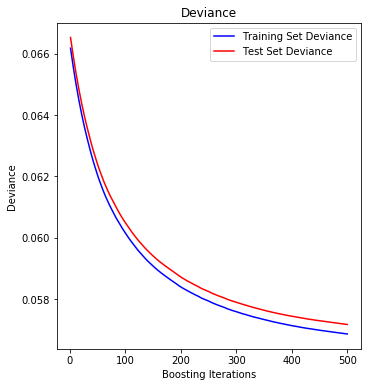

In [50]:
# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(GBR.staged_predict(X_test)):
    test_score[i] = GBR.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, GBR.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

Load test.csv file and compute 

In [89]:
test_normalized = pd.read_csv('test_price_normalized.csv')[:LIMIT]
test_all = pd.read_csv('data/test.csv')[:LIMIT]

In [90]:
test_normalized

,Unnamed: 0,item_id,category_name,price,cat_price,cat_std,norm_price
0,0,6544e41a8817,Детская одежда и обувь,NaN,1.070896e+04,1.070896e+04,NaN
1,1,65b9484d670f,Велосипеды,3000.0,8.377978e+03,8.377978e+03,-0.641918
2,2,8bab230b2ecd,Аудио и видео,15000.0,1.173186e+05,1.173186e+05,-0.872143
3,3,8e348601fefc,Бытовая техника,4500.0,7.083943e+03,7.083943e+03,-0.364761
4,4,8bd2fe400b89,Товары для детей и игрушки,4900.0,3.878576e+03,3.878576e+03,0.263350
5,5,c63dbd6c657f,Ремонт и строительство,500.0,1.979678e+04,1.979678e+04,-0.974743
6,6,6d1a410df86e,Ноутбуки,20990.0,1.360272e+04,1.360272e+04,0.543074
7,7,e8d3e7922b80,Телефоны,990.0,2.393076e+04,2.393076e+04,-0.958631
8,8,2bc1ab208462,Товары для компьютера,1200.0,6.959339e+03,6.959339e+03,-0.827570
9,9,7e05d77a9181,Детская одежда и обувь,400.0,1.070896e+04,1.070896e+04,-0.962648


In [91]:
test2 = pd.concat([test_normalized[['item_id', 'price', 'norm_price']], 
                  pd.get_dummies(test_all[['category_name', 'user_type']])], 
                  axis=1) 
test2.head()

,item_id,price,norm_price,category_name_Автомобили,category_name_Аквариум,category_name_Аудио и видео,category_name_Билеты и путешествия,category_name_Бытовая техника,category_name_Велосипеды,category_name_Водный транспорт,...,category_name_Спорт и отдых,category_name_Телефоны,category_name_Товары для детей и игрушки,category_name_Товары для животных,category_name_Товары для компьютера,category_name_Фототехника,category_name_Часы и украшения,user_type_Company,user_type_Private,user_type_Shop
0,6544e41a8817,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,65b9484d670f,3000.0,-0.641918,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,8bab230b2ecd,15000.0,-0.872143,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,8e348601fefc,4500.0,-0.364761,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,8bd2fe400b89,4900.0,0.263350,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [92]:
test2 = test2.dropna()
test_id = test2['item_id']
test2 = test2.drop(['item_id'], axis=1)

test2_probability = GBR.predict(test2)
test2_probability


array([0.27037236, 0.19660932, 0.28314218, ..., 0.19660932, 0.05971974,
       0.18034079])

In [94]:
print(len(test2))
print(len(test2_probability))
print(len(test_id))

469941
469941
469941


In [95]:
d = {'item_id': test_id, 'deal_probability': test2_probability}
test_output = pd.DataFrame(data=d)
test_output

,item_id,deal_probability
1,65b9484d670f,0.270372
2,8bab230b2ecd,0.196609
3,8e348601fefc,0.283142
4,8bd2fe400b89,0.204282
5,c63dbd6c657f,0.167920
6,6d1a410df86e,0.064621
7,e8d3e7922b80,0.076585
8,2bc1ab208462,0.145445
9,7e05d77a9181,0.063047
10,e2ec19a3ca2b,0.417394


In [96]:
test_output.to_csv('tabular.csv')